In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!wget https://raw.githubusercontent.com/ragitu5552/Machine-Learning-Specialization-Coursera/main/C1%20-%20Supervised%20Machine%20Learning%20-%20Regression%20and%20Classification/week2/C1W2A1/data/ex1data1.txt

--2024-07-26 04:01:31--  https://raw.githubusercontent.com/ragitu5552/Machine-Learning-Specialization-Coursera/main/C1%20-%20Supervised%20Machine%20Learning%20-%20Regression%20and%20Classification/week2/C1W2A1/data/ex1data1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1359 (1.3K) [text/plain]
Saving to: ‘ex1data1.txt’

ex1data1.txt        100%[===================>]   1.33K  --.-KB/s    in 0s      

2024-07-26 04:01:31 (44.4 MB/s) - ‘ex1data1.txt’ saved [1359/1359]



In [3]:
!wget https://raw.githubusercontent.com/ragitu5552/Machine-Learning-Specialization-Coursera/main/C1%20-%20Supervised%20Machine%20Learning%20-%20Regression%20and%20Classification/week2/C1W2A1/data/ex1data2.txt

--2024-07-26 04:01:32--  https://raw.githubusercontent.com/ragitu5552/Machine-Learning-Specialization-Coursera/main/C1%20-%20Supervised%20Machine%20Learning%20-%20Regression%20and%20Classification/week2/C1W2A1/data/ex1data2.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 657 [text/plain]
Saving to: ‘ex1data2.txt’

ex1data2.txt        100%[===================>]     657  --.-KB/s    in 0s      

2024-07-26 04:01:32 (36.5 MB/s) - ‘ex1data2.txt’ saved [657/657]



In [4]:
import numpy as np

def load_data():
    data = np.loadtxt("ex1data1.txt", delimiter=',')
    X = data[:,0]
    y = data[:,1]
    return X, y

def load_data_multi():
    data = np.loadtxt("ex1data2.txt", delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y

x_train, y_train = load_data()

In [5]:
def get_batch(input, target):
  ix = torch.randint(0, 91, (5, ))
  x = torch.tensor(x_train[ix]).view(5, -1).float()
  y = torch.tensor(y_train[ix]).view(5, -1).float()
  return x, y

In [24]:
g = torch.Generator().manual_seed(1667)
w = torch.randn(1, dtype=torch.float32, generator=g, requires_grad=True)
b = torch.zeros(1, dtype=torch.float32, requires_grad=True)
w, b

(tensor([-1.6827], requires_grad=True), tensor([0.], requires_grad=True))

In [31]:
loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD([w, b], lr=0.001, momentum=0.5)
optimizer1 = torch.optim.Adam([w, b], lr=0.0001)

In [26]:
lossi = []
prediction = []
for i in range(1000):
  #forward pass
  x, y = get_batch(x_train, y_train)
  out = w * x +b
  #loss
  error = loss(out, y)
  lossi.append(error.view(-1).item())
  if i%100 == 0:
    print(error.item())
  # if i < 300:
  #   lr = 0.01
  # else:
  #   lr = 0.001

  # w.grad=None
  # b.grad = None
  # error.backward()

  # w.data += -lr*w.grad
  # b.data += -lr*b.grad
  optimizer.zero_grad()
  error.backward()
  optimizer.step()

933.9649658203125
2.740565061569214
37.289390563964844
11.662454605102539
4.833171367645264
7.457254886627197
4.968829154968262
12.701762199401855
7.341977596282959
3.7553622722625732


In [27]:
prediction = w.detach().numpy() * x_train + b.detach().numpy()

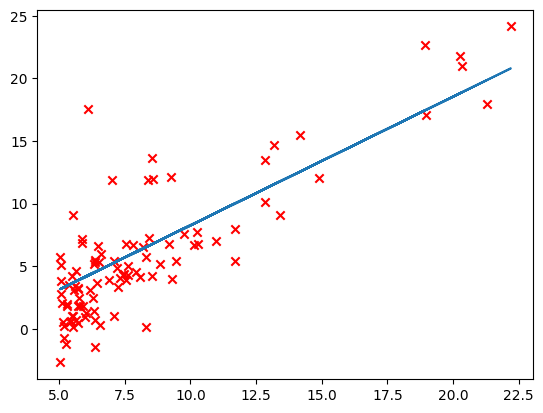

In [28]:
plt.scatter(x_train, y_train, c='r', marker='x')
plt.plot(x_train, prediction)

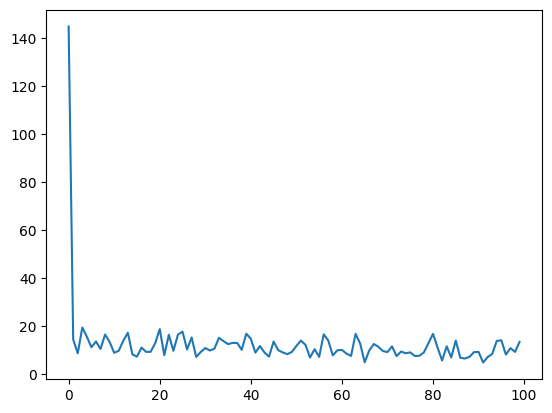

In [29]:
plt.plot(torch.tensor(lossi).view(100, -1).mean(dim=1))

In [32]:
lossi = []
prediction = []
for i in range(1000):
  #forward pass
  x, y = get_batch(x_train, y_train)
  out = w * x +b
  #loss
  error = loss(out, y)
  lossi.append(error.view(-1).item())
  if i%100 == 0:
    print(error.item())
  # if i < 300:
  #   lr = 0.01
  # else:
  #   lr = 0.001

  # w.grad=None
  # b.grad = None
  # error.backward()

  # w.data += -lr*w.grad
  # b.data += -lr*b.grad
  optimizer1.zero_grad()
  error.backward()
  optimizer1.step()

5.3803486824035645
2.352487087249756
13.0994291305542
4.452093124389648
2.316427230834961
38.07559585571289
6.52942419052124
14.971809387207031
4.267670631408691
12.099493026733398


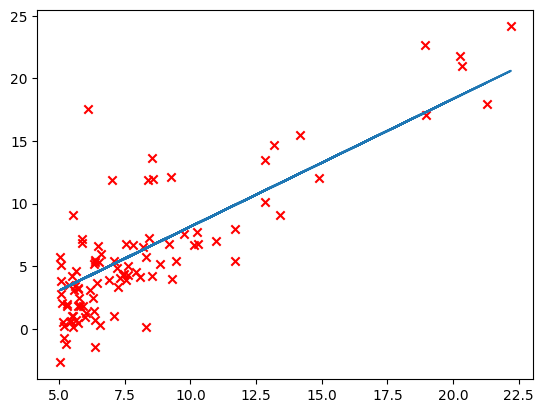

In [33]:
prediction = w.detach().numpy() * x_train + b.detach().numpy()
plt.scatter(x_train, y_train, c='r', marker='x')
plt.plot(x_train, prediction)

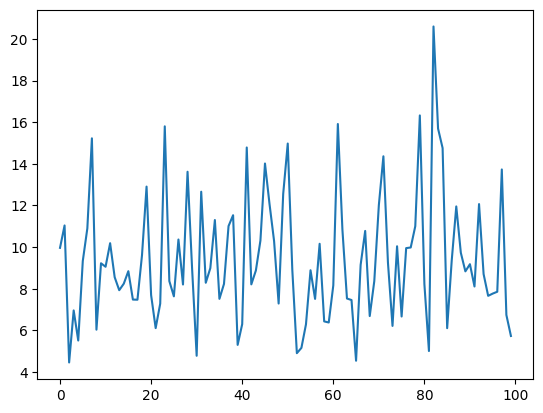

In [34]:
plt.plot(torch.tensor(lossi).view(100, -1).mean(dim=1))